In [1]:
import numpy as np
import matplotlib.pylab as plt
from tqdm import tqdm
plt.style.use('ggplot')
import time
from tqdm import tqdm_notebook as tqdm
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook().pandas(desc="progress")
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
##############################
##############################
##############################
########## PROBLEM1 ##########
##############################
##############################
##############################

In [42]:
%%time
# algorithm parameters



N = 500
lb = 1e-6
error = 1
tol = 1e-6
max_iter = 1000
n_iter = 0
step = 0.5
nplot = 100


# model parameters


alpha   = 0.36
beta   = 0.95
theta   = 1
delta   = 0.05
p = 0.5
epsilon = 0.05

T = np.array([[p,1-p],[1-p,p]])
     

k_min = 0.01
k_max = 10

# placeholders
k_grid = np.linspace(k_min,k_max, N)





CPU times: user 110 µs, sys: 11 µs, total: 121 µs
Wall time: 114 µs


In [43]:
V_new[0]

array([-2.68413341, -2.47149049])

In [44]:
%%time
# CPU times: user 29.1 µs
##############################
##############################
##############################
##### Initializing stuff #####
##############################
##############################
##############################
 

V_old = np.zeros((N,T.shape[0])) # We start by guessing V(k) = 0 for all k

V_new = np.zeros((N,T.shape[0]))

V_inter = np.zeros((N))

k_grid_new = np.zeros((N,T.shape[0])) # This will be used to store the policy function

CPU times: user 26 µs, sys: 15 µs, total: 41 µs
Wall time: 46 µs


In [45]:
# CPU times: user 02:29 m

pbar = tqdm(total = n_iter+1)
while (error > tol) & (n_iter < max_iter):
    
    n_iter += 1
    
    for i in range(N):
        for z in range(T.shape[0]):
            
            k = k_grid[i]
            prob = T[z]
            A = 1 - int(z == 0)*epsilon  + int(z != 0)*epsilon
            
            
            # this can be vectorized to speed up things
            for j in range(N):
                y = A*k**(alpha)
                k_cand = k_grid[j]
                
                if (y + (1-delta)*k - k_cand <= 0):
                    V_inter[j] = -1000000
                    
                else: 
                    
                    u =  np.log(y + (1-delta)*k - k_cand)
                    V_inter[j] = u + beta*(T[z][0]*V_old[j,0] + T[z][1]*V_old[j,1])
            
            
            opt_k = np.argmax(V_inter)
            opt_v = np.max(V_inter)
            
            
            V_new[i, z] = opt_v
            
            k_grid_new[i, z] = k_grid[opt_k]
    
    error = np.max(np.abs(V_new - V_old))
    
    V_old=step*V_old+(1-step)*V_new
    
    pbar.update(1)
pbar.close()
    

KeyboardInterrupt: 

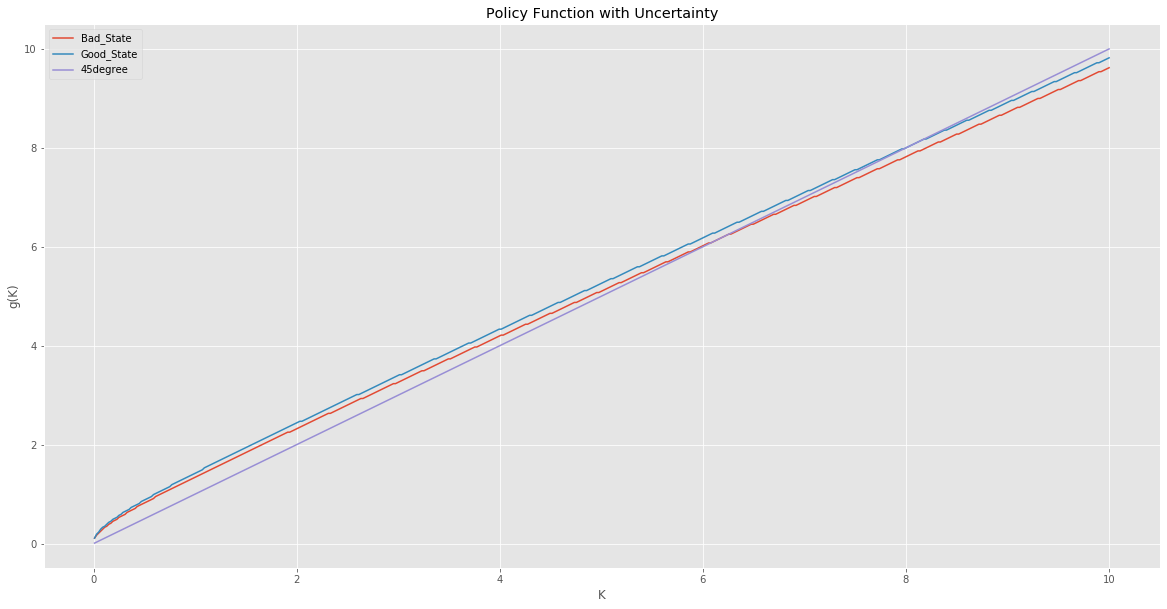

In [47]:
# policy

plt.figure(figsize=(20,10))
plt.plot(k_grid, k_grid_new[:,0], label='Bad_State')
plt.plot(k_grid, k_grid_new[:,1], label='Good_State')
plt.plot(k_grid, k_grid, label='45degree')
plt.title('Policy Function with Uncertainty')
plt.xlabel('K')
plt.ylabel('g(K)')
plt.legend()
plt.show()

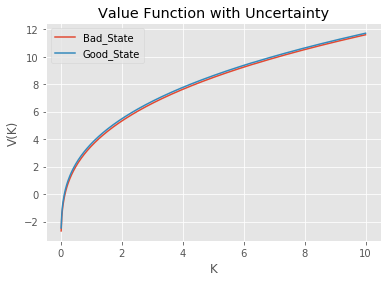

In [41]:
# P = 0.5

plt.plot(k_grid, V_new[:,0], label='Bad_State')
plt.plot(k_grid, V_new[:,1], label='Good_State')
plt.title('Value Function with Uncertainty')
plt.xlabel('K')
plt.ylabel('V(K)')
plt.legend()
plt.show()

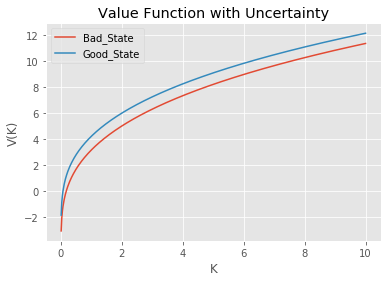

In [36]:
# P = 0.95

plt.plot(k_grid, V_new[:,0], label='Bad_State')
plt.plot(k_grid, V_new[:,1], label='Good_State')
plt.title('Value Function with Uncertainty')
plt.xlabel('K')
plt.ylabel('V(K)')
plt.legend()
plt.show()

In [ ]:
##############################
##############################
##############################
########## PROBLEM2 ##########
##############################
##############################
##############################

In [69]:
%%time
# algorithm parameters



N = 500
lb = 1e-6
error = 1
tol = 1e-6
max_iter = 1000
n_iter = 0
step = 0.5
nplot = 100


# model parameters


alpha   = 0.36
beta   = 0.96
theta   = 1
delta   = 0.05
p = 0.95
epsilon = 0.25
b = 0.1
R = 0.02

T = np.array([[p,1-p],[1-p,p]])
     

a_max = 10

# placeholders
a_grid = np.linspace(b,a_max, N)






CPU times: user 118 µs, sys: 8 µs, total: 126 µs
Wall time: 124 µs


In [70]:
%%time
# CPU times: user 29.1 µs
##############################
##############################
##############################
##### Initializing stuff #####
##############################
##############################
##############################
 

V_old = np.zeros((N,T.shape[0])) # We start by guessing V(k) = 0 for all k

V_new = np.zeros((N,T.shape[0]))

V_inter = np.zeros((N))

a_grid_new = np.zeros((N,T.shape[0])) # This will be used to store the policy function

CPU times: user 22 µs, sys: 5 µs, total: 27 µs
Wall time: 31 µs


In [71]:
# CPU times: user 05:29 m

pbar = tqdm(total = n_iter+1)
while (error > tol) & (n_iter < max_iter):
    
    n_iter += 1
    
    for i in range(N):
        for z in range(T.shape[0]):
            
            a = a_grid[i]

            A = 1 - int(z == 0)*epsilon  + int(z != 0)*epsilon
            
            
            # this can be vectorized to speed up things
            # y = ((1+R)*a+ A)*np.ones(N)
            # V_inter = np.log(y - a_grid)
            
#             opt_a = np.argmax(V_inter)
#             opt_v = np.max(V_inter)
            
            
            for j in range(N):
                
                y = (1+R)*a+ A
                a_cand = a_grid[j]
                
                if (y  - a_cand <= 0):
                    V_inter[j] = -1000000
                    
                else: 
                    
                    u =  np.log(y - a_cand)
                    V_inter[j] = u + beta*(T[z][0]*V_old[j,0] + T[z][1]*V_old[j,1])
            
            
            opt_a = np.argmax(V_inter)
            opt_v = np.max(V_inter)
            
            
            V_new[i, z] = opt_v
            
            a_grid_new[i, z] = a_grid[opt_a]
    
    error = np.max(np.abs(V_new - V_old))
    
    V_old=step*V_old+(1-step)*V_new
    
    pbar.update(1)
pbar.close()
    

KeyboardInterrupt: 

In [ ]:
# policy
# initial parameters
plt.figure(figsize=(20,10))
plt.plot(a_grid, a_grid_new[:,0], label='Bad_State')
plt.plot(a_grid, a_grid_new[:,1], label='Good_State')
plt.plot(a_grid, a_grid, label='45degree')
plt.title('Policy Function with Uncertainty')
plt.xlabel('a')
plt.ylabel('a(K)')
plt.legend()
plt.show()

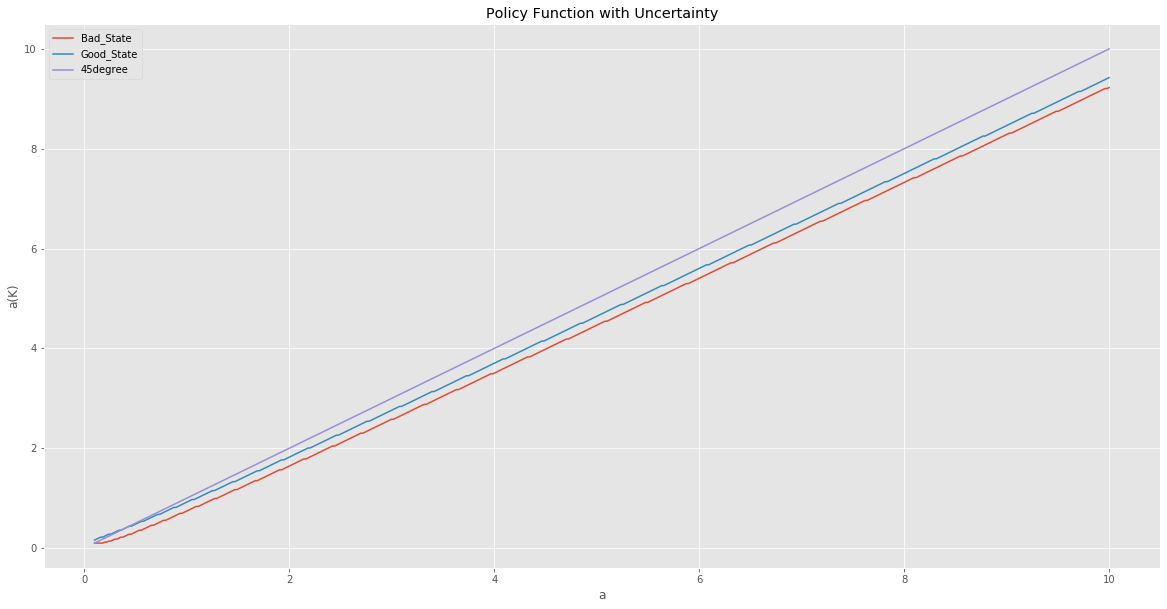

In [60]:
# policy
# Stronger borrowing constraint
plt.figure(figsize=(20,10))
plt.plot(a_grid, a_grid_new[:,0], label='Bad_State')
plt.plot(a_grid, a_grid_new[:,1], label='Good_State')
plt.plot(a_grid, a_grid, label='45degree')
plt.title('Policy Function with Uncertainty')
plt.xlabel('a')
plt.ylabel('a(K)')
plt.legend()
plt.show()

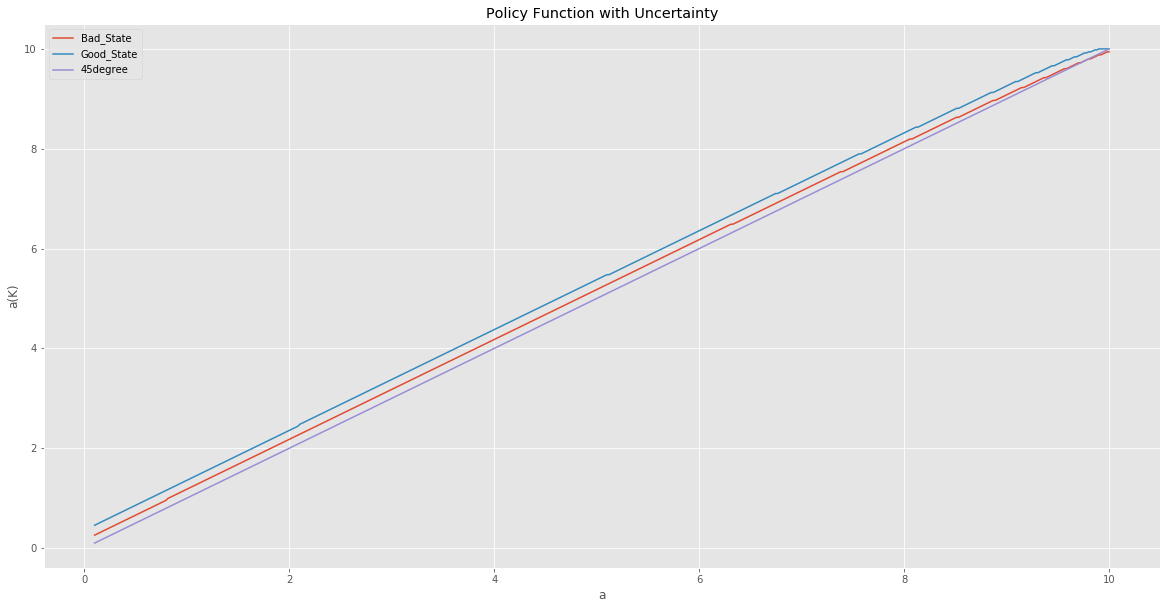

In [64]:
# policy
# Higher interest rate
plt.figure(figsize=(20,10))
plt.plot(a_grid, a_grid_new[:,0], label='Bad_State')
plt.plot(a_grid, a_grid_new[:,1], label='Good_State')
plt.plot(a_grid, a_grid, label='45degree')
plt.title('Policy Function with Uncertainty')
plt.xlabel('a')
plt.ylabel('a(K)')
plt.legend()
plt.show()

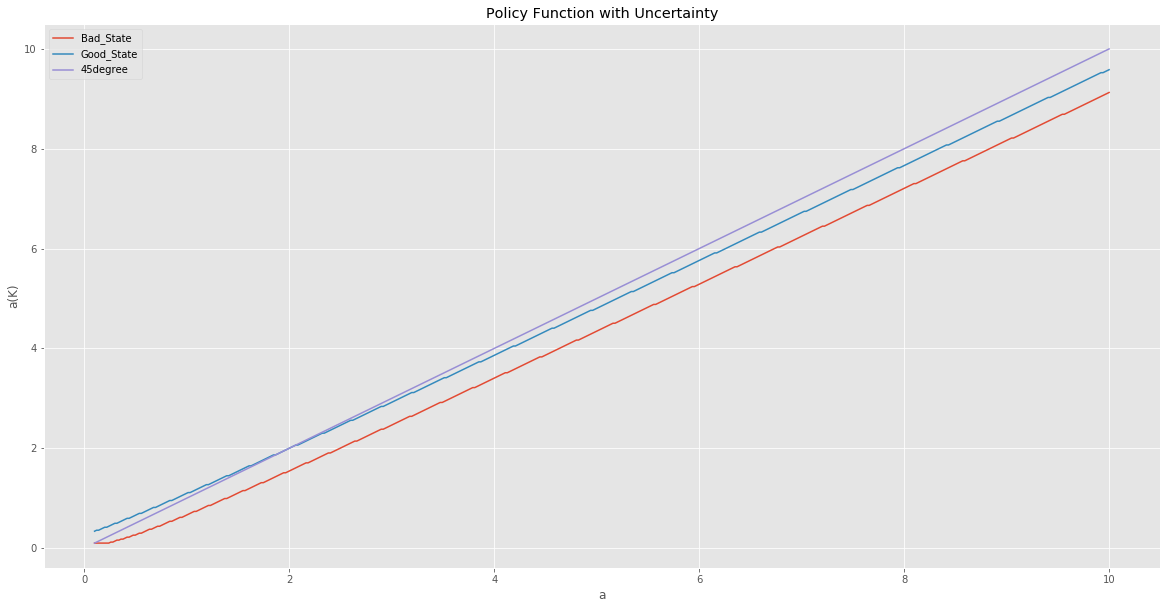

In [68]:
# policy
# Higher income variance low interest rate
plt.figure(figsize=(20,10))
plt.plot(a_grid, a_grid_new[:,0], label='Bad_State')
plt.plot(a_grid, a_grid_new[:,1], label='Good_State')
plt.plot(a_grid, a_grid, label='45degree')
plt.title('Policy Function with Uncertainty')
plt.xlabel('a')
plt.ylabel('a(K)')
plt.legend()
plt.show()

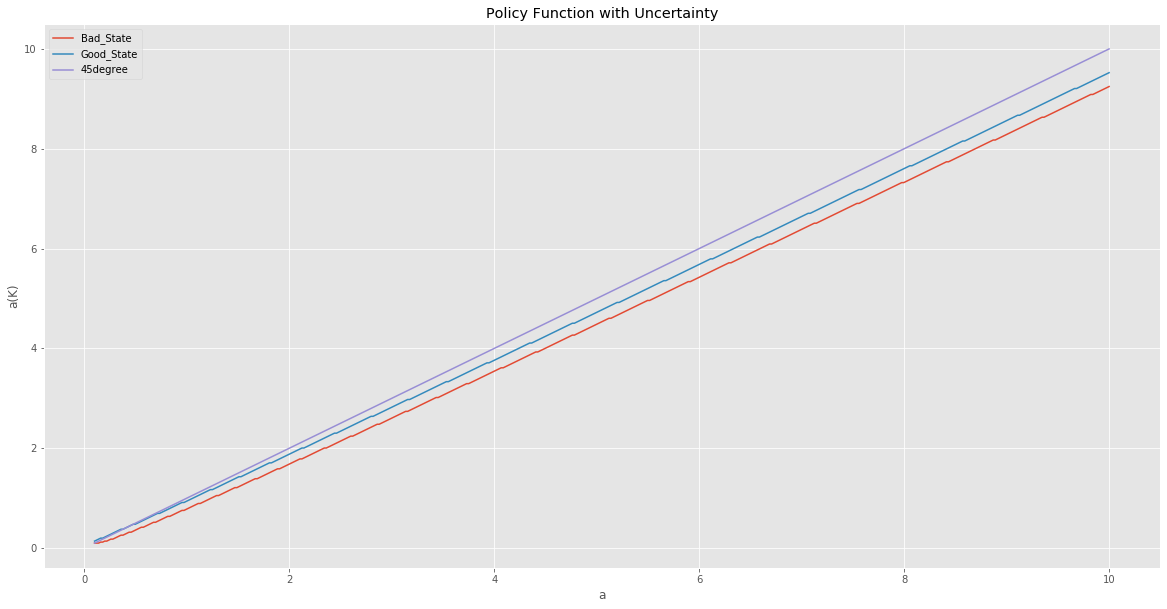

In [72]:
# policy
# Higher p low interest rate
plt.figure(figsize=(20,10))
plt.plot(a_grid, a_grid_new[:,0], label='Bad_State')
plt.plot(a_grid, a_grid_new[:,1], label='Good_State')
plt.plot(a_grid, a_grid, label='45degree')
plt.title('Policy Function with Uncertainty')
plt.xlabel('a')
plt.ylabel('a(K)')
plt.legend()
plt.show()

In [ ]:
# Intuition on comparative statics:
# 
# Higher p reduces the variance of income distribution and reduces incentives to 
# save and smooth consumption since low income states are low
# and consumer tries to maximize curren consumer more
# therefore policies will differ more across states than
# in the environment with p=0.5
#
# Higher epsilon increase the variance of income and 
# incentivizes individual to save more as now
# when his income is low due to realisation of
# the shock, he would lose a lot of utility (concave)
# unless he protected himself by saving preventively
# 
# Higher borrowing limit increases the incentives to save
# Since it takes away the ability of consumer
# to borrow infinitely when saving by itself
# is not beneficial. Also, it may decrease
# consumer welfare if the borrowing limit is too high
# Assume that income variation is low but the borrowing 
# limit is high then consumer has to save more
# than it is efficient for him given consumption
# smoothing motives
#